# Super spreader análise

## Compilando os dados das cidades com potencia de super spreader

In [1]:
import pandas as pd

In [2]:
df_municipios = pd.read_csv("../data/integrado/municipio.csv")
df_municipios= df_municipios[df_municipios['latitude'].notna()]

In [41]:
#Carregar arquivos em dataframe
from os import listdir
from os.path import isfile, join
path = "../data/calculado/calculo_spreader/dois"
nome_files = [f for f in listdir(path) if isfile(join(path, f))]



In [42]:
dic_df = {}
for nome_file in nome_files:
    cod_cidade = int(nome_file[-11:-4])
    dic_df[cod_cidade] = pd.read_csv(path+"/"+nome_file)

In [43]:
#Somar três valores: total de caso na cidade, total de casos no restante do pais e total de caso
lista_analise = []

for cod_cidade in dic_df.keys():
    # cod_cidade = 2611606
    df_cidade = dic_df[cod_cidade]
    filtro_cidade = df_cidade["cod_mun"]==cod_cidade
    num_cidade = df_cidade[filtro_cidade]["dia_29"].sum()
    num_espalhamento = df_cidade[~filtro_cidade]["dia_29"].sum()
    num_total = num_cidade + num_espalhamento
    lista_analise.append((cod_cidade, num_cidade, num_espalhamento, num_total))


In [44]:
df_analise = pd.DataFrame(lista_analise, columns=["cod_mun","cidade", "espalhamento", "total"])

In [49]:
df_analise = pd.read_csv("../data/calculado/spreaders_s15.csv")


In [50]:
df_analise = df_analise.merge(df_municipios[['cod_mun','nome_mun']], how='left', left_on='cod_mun', right_on='cod_mun')

(array([  3.,  17.,  56.,  63., 103., 127., 141., 157., 175., 177., 178.,
        140., 143., 128., 125., 110., 110.,  81., 111., 112., 106., 100.,
         87.,  85., 105.,  96.,  84.,  69.,  77.,  80.,  71.,  81.,  59.,
         71.,  53.,  52.,  53.,  63.,  58.,  58.,  42.,  37.,  48.,  51.,
         44.,  44.,  33.,  41.,  31.,  44.,  34.,  28.,  30.,  28.,  24.,
         27.,  35.,  24.,  18.,  25.,  20.,  20.,  22.,  12.,  19.,  16.,
         17.,  15.,  16.,  13.,  15.,  19.,  11.,  14.,  16.,   8.,  15.,
         10.,  11.,  10.,   8.,  13.,   6.,   6.,   6.,   6.,   6.,  10.,
          1.,  11.,   2.,   9.,   8.,   8.,   8.,   5.,   7.,   7.,   9.,
         11.]),
 array([  765.88915143,  1227.119399  ,  1688.34964657,  2149.57989413,
         2610.8101417 ,  3072.04038927,  3533.27063684,  3994.50088441,
         4455.73113198,  4916.96137955,  5378.19162712,  5839.42187469,
         6300.65212226,  6761.88236983,  7223.1126174 ,  7684.34286497,
         8145.57311254,  8606.

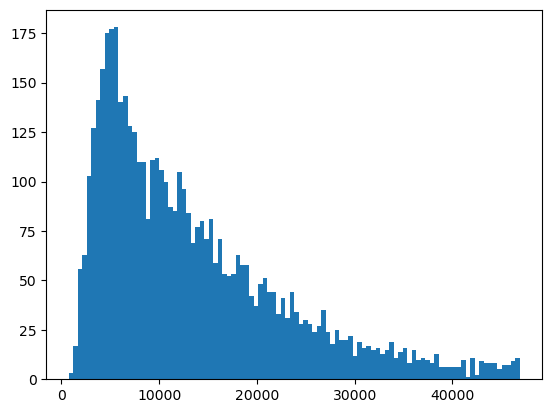

In [59]:
import matplotlib.pyplot as plt
plt.hist(df_analise["total"], bins = 100)

In [54]:
df_analise.sort_values(by='total', ascending=False).head(50)

,cod_mun,cidade,espalhamento,total,nome_mun
3402,3550308,41503.923801,5384.990108,46888.913908,São Paulo
2991,3304557,40965.171212,5878.963927,46844.135139,Rio de Janeiro
4898,5300108,33625.055145,13081.720669,46706.775815,Brasília
2177,3106200,44220.643437,2420.645969,46641.289405,Belo Horizonte
1510,2611606,40233.499477,6380.192462,46613.691939,Recife
4326,4314902,40108.104665,6499.952694,46608.057359,Porto Alegre
3084,3509502,28665.611125,17940.554390,46606.165516,Campinas
1448,2605459,32.909895,46555.190214,46588.100109,Fernando de Noronha
2041,2927408,40838.875082,5745.117548,46583.992630,Salvador
908,2304400,40631.843196,5937.108803,46568.951999,Fortaleza


<AxesSubplot: xlabel='cidade', ylabel='espalhamento'>

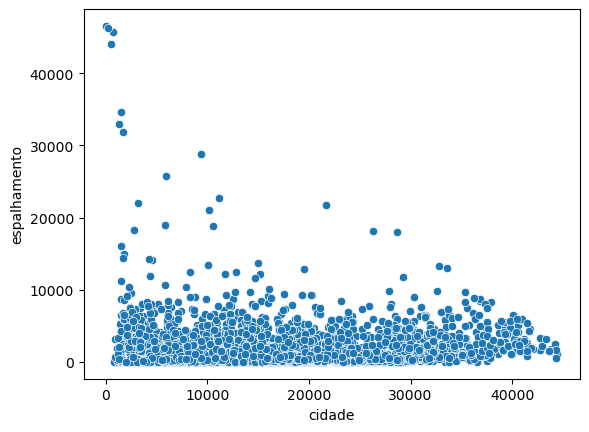

In [40]:
import seaborn as sns
sns.scatterplot(data=df_analise, x="cidade", y="espalhamento")

### Definir agrupamento de espalhamento
Será utilizado kmeans

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# >>> X = np.array([[1, 2], [1, 4], [1, 0],
# ...               [10, 2], [10, 4], [10, 0]])
# >>> kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# >>> kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_

### Escrever resultado

TODO: Escrever resultado depois de agrupar

In [65]:
#Escrever em csv resultado
# tb_municipio.to_csv("../data/integrado/municipio.csv", index=False)